In [5]:
# The code was removed by Watson Studio for sharing.

## 1. Download and Explore Dataset

In [6]:
import requests
import pandas as pd
import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [7]:
!pip install geocoder

Requirement not upgraded as not directly required: geocoder in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: click in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: ratelim in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: future in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: decorator in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ratelim->geocoder)
Requirement not upgraded as not directly required: chardet<3.1.0,

In [8]:
import geocoder # import geocoder

def getCoordinates(postal_code):
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
      lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]

    print(latitude)
    print(longitude)
    return latitude, longitude

In [9]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  25.14 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  36.74 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  49.49 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.06 MB/s
vincent-0.4.4- 100% |###################

#### Use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>to_explorer</em>, as shown below.

In [10]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
toronto_latitude = location.latitude
toronto_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(toronto_latitude, toronto_longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Next, we are going to start utilizing the Foursquare API to explore the restaurants and segment them.

In [11]:
# The code was removed by Watson Studio for sharing.

#### Now, let's get the venues that are in Toronto within a radius of 3000 meters.  (Unfortunately the FourSquare free account will return at most 100

In [12]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude, 
    toronto_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QQVBAH2YXNSQNUOMXLNZXG3YWZR4GY4VZZ15AH2OUL1X1SIG&client_secret=5WUJHLH4VQ3O1HBD30L2AFNGDJCTKSUCXLS0GGERD4UH4Z2W&v=20180605&ll=43.653963,-79.387207&radius=3000&limit=1000'

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c77747edd57977bd3fdc285'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5227bb01498e17bf485e6202-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
          'suffix': '.png'},
         'id': '4f2a25ac4b909258e854f55f',
         'name': 'Neighborhood',
         'pluralName': 'Neighborhoods',
         'primary': True,
         'shortName': 'Neighborhood'}],
       'id': '5227bb01498e17bf485e6202',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'distance': 174,
        'formattedAddress': ['Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng': -79.38529600606677}],
        'lat': 43.6532

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng
0,5227bb01498e17bf485e6202,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,4ad4c05ef964a520a6f620e3,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,4ad4c05ef964a520daf620e3,Art Gallery of Ontario,Art Gallery,43.654003,-79.392922
3,4ad4c062f964a520e5f720e3,Four Seasons Centre for the Performing Arts,Concert Hall,43.650609,-79.386280
4,4adf3c01f964a5208f7821e3,Aboveground Art Supplies,Arts & Crafts Store,43.652646,-79.390925


And how many venues were returned by Foursquare?

In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [17]:
# What are the restaurant-related categories?
nearby_venues.categories.unique()

array(['Neighborhood', 'Plaza', 'Art Gallery', 'Concert Hall',
       'Arts & Crafts Store', 'Sushi Restaurant', 'Gastropub',
       'Vegetarian / Vegan Restaurant', 'Coffee Shop', 'Breakfast Spot',
       'Clothing Store', 'Speakeasy', 'Thai Restaurant',
       'Mediterranean Restaurant', 'Shopping Mall', 'Comic Shop',
       'American Restaurant', 'Hotel', 'Sandwich Place', 'Theater',
       'Burrito Place', 'Pizza Place', 'Brazilian Restaurant', 'Café',
       'Restaurant', 'Movie Theater', 'Gym', 'Record Shop',
       'French Restaurant', 'Bookstore', 'Cosmetics Shop',
       'Sporting Goods Shop', 'Shoe Store', 'Japanese Restaurant',
       'Comedy Club', 'Mexican Restaurant', 'Diner', 'Italian Restaurant',
       'Organic Grocery', 'Dessert Shop', 'Train Station', 'Museum',
       'Cocktail Bar', 'Supermarket', 'Food Truck', 'Beer Bar', 'Bar',
       'Seafood Restaurant', 'Scenic Lookout', 'Spanish Restaurant',
       'Monument / Landmark', 'Middle Eastern Restaurant', 'Brewery',

Related categories have words 'Restaurant' and 'Café', 'Coffee Shop', 'Tea Room', 'Breakfast Spot'

In [18]:
toronto_restaurants = nearby_venues[nearby_venues['categories'].str.contains('Restaurant' ) | nearby_venues['categories'].str.contains('Café') | 
                                    nearby_venues['categories'].str.contains('Tea Room') | nearby_venues['categories'].str.contains('Breakfast Spot') | 
                                    nearby_venues['categories'].str.contains('Sandwich Place') | nearby_venues['categories'].str.contains('BBQ Joint') | 
                                    nearby_venues['categories'].str.contains('Steakhouse') | nearby_venues['categories'].str.contains('Salad Place')
                                   ].reset_index(drop=True)
toronto_restaurants

,id,name,categories,lat,lng
0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090
1,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758
2,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
3,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579
4,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381
5,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266
6,51755dc7498ece19b7261641,Banh Mi Boys,Sandwich Place,43.659188,-79.382131
7,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151
8,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765
9,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320


Save the intermediate result to save API calls

In [19]:
project.save_data("toronto_restaurants.csv", toronto_restaurants.to_csv(index=False), overwrite=True)

{'asset_id': 'e1bae5a7-4630-4432-828a-3651802b3c9e',
 'bucket_name': 'default-donotdelete-pr-atsivsvyzx27tq',
 'file_name': 'toronto_restaurants.csv',
 'message': 'File saved to project storage.'}

load the data from the csv

In [20]:
# Fetch the file
csv_file = project.get_file("toronto_restaurants.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
csv_file.seek(0)
toronto_restaurants = pd.read_csv(csv_file)

toronto_restaurants.head()

,id,name,categories,lat,lng
0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090
1,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758
2,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
3,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579
4,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381


In [21]:
def getVenuesDetails(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        venue_id,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION)
    
    result = requests.get(url).json()
    return result

In [22]:
def getAttributes(_result):
    stats = _result['response']['venue']['stats']

    if ('tipCount' in stats):
        tipCount = stats['tipCount']
    else:
        tipCount = 0
    
    if ('visitsCount' in stats):
        visitsCount = stats['visitsCount']
    else:
        visitsCount = 0
    
    priceTier = _result['response']['venue']['price']['tier']
    rating = _result['response']['venue']['rating']

    return tipCount, visitsCount, priceTier, rating

In [23]:
# Uncomment to test
# details = getVenuesDetails('504bbf2ce4b0168121235cbe')

In [24]:
# Uncomment to test
# tipCount, visitsCount, priceTier, rating = getAttributes(details)
# details

In [25]:
for i, row in toronto_restaurants.iterrows():
    _result = getVenuesDetails(row['id'])
    tipCount, visitsCount, priceTier, rating = getAttributes(_result)
    toronto_restaurants.at[i,'tipCount'] = tipCount
    toronto_restaurants.at[i,'visitsCount'] = visitsCount
    toronto_restaurants.at[i,'priceTier'] = priceTier
    toronto_restaurants.at[i,'rating'] = rating
    
toronto_restaurants

,id,name,categories,lat,lng,tipCount,visitsCount,priceTier,rating
0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,0.0,3.0,8.8
1,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,0.0,2.0,8.8
2,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,0.0,1.0,8.7
3,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,0.0,2.0,9.4
4,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,0.0,2.0,9.4
5,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,0.0,3.0,9.2
6,51755dc7498ece19b7261641,Banh Mi Boys,Sandwich Place,43.659188,-79.382131,88.0,0.0,1.0,9.2
7,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,0.0,3.0,8.7
8,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,0.0,2.0,9.0
9,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,0.0,3.0,9.1


Save the intermediate result to save limited API calls

In [26]:
project.save_data("toronto_restaurants_details.csv", toronto_restaurants.to_csv(index=False), overwrite=True)

{'asset_id': '44eda931-e961-44b5-8a6c-14d0dfaa69ec',
 'bucket_name': 'default-donotdelete-pr-atsivsvyzx27tq',
 'file_name': 'toronto_restaurants_details.csv',
 'message': 'File saved to project storage.'}

Load the intermediate data

In [27]:
# Fetch the file
csv_file = project.get_file("toronto_restaurants_details.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
csv_file.seek(0)
toronto_restaurants = pd.read_csv(csv_file)

toronto_restaurants

,id,name,categories,lat,lng,tipCount,visitsCount,priceTier,rating
0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,0.0,3.0,8.8
1,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,0.0,2.0,8.8
2,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,0.0,1.0,8.7
3,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,0.0,2.0,9.4
4,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,0.0,2.0,9.4
5,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,0.0,3.0,9.2
6,51755dc7498ece19b7261641,Banh Mi Boys,Sandwich Place,43.659188,-79.382131,88.0,0.0,1.0,9.2
7,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,0.0,3.0,8.7
8,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,0.0,2.0,9.0
9,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,0.0,3.0,9.1


find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(toronto_restaurants['categories'].unique())))

There are 20 uniques categories.


The free FourSquare account does not return the visitsCount.  Drop the column.

In [29]:
toronto_restaurants.drop(['visitsCount'], axis=1, inplace=True)

In [30]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_restaurants[['categories']], prefix="", prefix_sep="")
toronto_onehot.head()

,American Restaurant,BBQ Joint,Brazilian Restaurant,Breakfast Spot,Café,French Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


examine the new dataframe size.

In [31]:
toronto_onehot.shape

(34, 20)

Replace the category column with the one-hot encoded version

In [32]:
toronto_restaurants_one_hot = toronto_restaurants.join(toronto_onehot)
toronto_restaurants_one_hot.head()

,id,name,categories,lat,lng,tipCount,priceTier,rating,American Restaurant,BBQ Joint,...,Middle Eastern Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,3.0,8.8,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,2.0,8.8,0,0,...,0,0,0,0,0,0,0,0,0,1
2,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,1.0,8.7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,2.0,9.4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,2.0,9.4,0,0,...,0,0,0,0,0,0,0,0,0,0


confirm the new size

In [33]:
toronto_restaurants_one_hot.shape

(34, 28)

## Cluster Restaurants

Elbow method gives us an idea on what a good $k$ number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids. We pick $k$ at the spot where SSE starts to flatten out and forming an elbow. We'll use the geyser dataset and evaluate SSE for different values of $k$ and see where the curve might form an elbow and flatten out. 

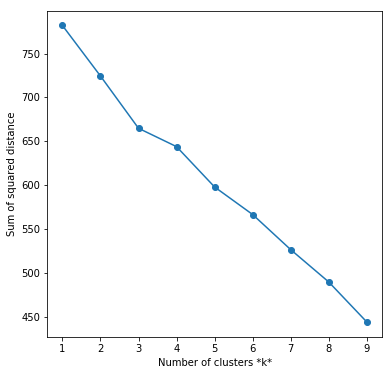

In [44]:
import matplotlib.pyplot as plt

toronto_restaurants_one_hot_clustering = toronto_restaurants_one_hot.drop(['id', 'name', 'categories', 'lat', 'lng'], axis=1)

# Standarize features
scaler = StandardScaler()
toronto_restaurants_one_hot_clustering_std = scaler.fit_transform(toronto_restaurants_one_hot_clustering)
toronto_restaurants_one_hot_clustering_std
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(toronto_restaurants_one_hot_clustering_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()

There is not a very clear "elbow" but 3 seems like a reasonable number

In [35]:
# set number of clusters
kclusters = 3

toronto_restaurants_one_hot_clustering = toronto_restaurants_one_hot.drop(['id', 'name', 'categories', 'lat', 'lng'], axis=1)

# Standarize features
scaler = StandardScaler()
toronto_restaurants_one_hot_clustering_std = scaler.fit_transform(toronto_restaurants_one_hot_clustering)
toronto_restaurants_one_hot_clustering_std

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_restaurants_one_hot_clustering_std)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2], dtype=int32)

create a new dataframe that includes the cluster label

In [36]:
# add clustering labels
toronto_restaurants.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_restaurants

,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating
0,0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,3.0,8.8
1,0,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,2.0,8.8
2,0,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,1.0,8.7
3,0,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,2.0,9.4
4,0,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,2.0,9.4
5,0,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,3.0,9.2
6,1,51755dc7498ece19b7261641,Banh Mi Boys,Sandwich Place,43.659188,-79.382131,88.0,1.0,9.2
7,0,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,3.0,8.7
8,0,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,2.0,9.0
9,0,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,3.0,9.1


Finally, let's visualize the resulting clusters

In [37]:
# create map
map_clusters = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_restaurants['lat'], toronto_restaurants['lng'], toronto_restaurants['name'], toronto_restaurants['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1 (Mainstream restaurants)

In [38]:
toronto_restaurants.loc[toronto_restaurants['Cluster Labels'] == 0]

,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating
0,0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,3.0,8.8
1,0,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,2.0,8.8
2,0,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,1.0,8.7
3,0,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,2.0,9.4
4,0,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,2.0,9.4
5,0,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,3.0,9.2
7,0,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,3.0,8.7
8,0,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,2.0,9.0
9,0,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,3.0,9.1
10,0,55a9c018498e8b05f7f870f1,Alo,French Restaurant,43.648574,-79.396243,19.0,3.0,9.2


#### Cluster 2 (Cheap sandwich places)

In [39]:
toronto_restaurants.loc[toronto_restaurants['Cluster Labels'] == 1]

,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating
6,1,51755dc7498ece19b7261641,Banh Mi Boys,Sandwich Place,43.659188,-79.382131,88.0,1.0,9.2
11,1,4edeae9d61af80fe89aa3f54,Banh Mi Boys,Sandwich Place,43.648650,-79.396859,185.0,1.0,9.2
29,1,56437cac498e5a88165d13ce,Porchetta & Co,Sandwich Place,43.644664,-79.398813,27.0,1.0,9.4


#### Cluster 3 (Mexican Restaurants)

In [40]:
toronto_restaurants.loc[toronto_restaurants['Cluster Labels'] == 2]

,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating
15,2,50427a03e4b08d9f5931f593,Seven Lives - Tacos y Mariscos,Mexican Restaurant,43.654418,-79.400545,93.0,1.0,9.2
33,2,544fc36c498ea63958331891,Wilbur Mexicana,Mexican Restaurant,43.644810,-79.398644,71.0,1.0,9.1


## Example of Recommendation of Alternative Restaurant

Let us use Canoe (4ad4c05df964a52059f620e3) as an example 

In [41]:
canoe_row = toronto_restaurants.loc[toronto_restaurants['id'] == '4ad4c05df964a52059f620e3'].reset_index().loc[0]
canoe_cluster_label = canoe_row['Cluster Labels']
canoe_lat = canoe_row['lat']
canoe_lng = canoe_row['lng']

In [42]:
recommendations = toronto_restaurants.loc[toronto_restaurants['Cluster Labels'] == canoe_cluster_label].reset_index()
recommendations

,index,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating
0,0,0,509bb871e4b09c7ac93f6642,JaBistro,Sushi Restaurant,43.649687,-79.388090,71.0,3.0,8.8
1,1,0,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,31.0,2.0,8.8
2,2,0,537773d1498e74a75bb75c1e,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,55.0,1.0,8.7
3,3,0,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,2.0,9.4
4,4,0,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,2.0,9.4
5,5,0,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,3.0,9.2
6,7,0,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,3.0,8.7
7,8,0,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,2.0,9.0
8,9,0,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,3.0,9.1
9,10,0,55a9c018498e8b05f7f870f1,Alo,French Restaurant,43.648574,-79.396243,19.0,3.0,9.2


### Present the recommendations sorted by distance away from Canoe

In [43]:
from geopy.distance import geodesic

# Add distance from Canoe to each recommendation
for i, row in recommendations.iterrows():
    distance = geodesic((canoe_lat, canoe_lng), (row.lat, row.lng)).km
    recommendations.at[i,'distance'] = distance
    
recommendations.sort_values(by=['distance'])

,index,Cluster Labels,id,name,categories,lat,lng,tipCount,priceTier,rating,distance
8,9,0,4ad4c05df964a52059f620e3,Canoe,Restaurant,43.647452,-79.381320,74.0,3.0,9.1,0.000000
12,14,0,52138db911d22803b334c641,Mos Mos Coffee,Café,43.648159,-79.378745,11.0,1.0,8.8,0.222147
7,8,0,514627d1e4b0dba1b85e9ba8,Dineen Coffee,Café,43.650497,-79.378765,142.0,2.0,9.0,0.396161
5,5,0,506db1a9e4b0a3f3b31412f0,Richmond Station,American Restaurant,43.651569,-79.379266,110.0,3.0,9.2,0.486478
15,18,0,4d5effa95b276dcbc3b201c6,TOCA,Italian Restaurant,43.645431,-79.387059,10.0,4.0,8.7,0.514565
28,32,0,5346c98a498ed612110d0f60,iQ Food Co,Salad Place,43.642851,-79.382081,15.0,1.0,8.9,0.514877
25,28,0,50b7c53616485cd9efad60d5,Sukhothai,Thai Restaurant,43.648487,-79.374547,85.0,2.0,8.7,0.558381
6,7,0,52ec621e498ec68fa15ee922,Copacabana Grilled Brazilian,Brazilian Restaurant,43.648333,-79.388151,47.0,3.0,8.7,0.559771
4,4,0,5321f4d9e4b07946702e6e08,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,76.0,2.0,9.4,0.569967
3,3,0,529612de11d2ab526191ccc9,Pai,Thai Restaurant,43.647923,-79.388579,192.0,2.0,9.4,0.588009
